In [231]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error ,r2_score 
from sklearn.model_selection import train_test_split
from statsmodels.compat import lzip
from sklearn.preprocessing import PolynomialFeatures

In [232]:
sales_df = pd.read_csv('advertising.csv')
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [233]:
sales_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [234]:
sales_df.info()
sales_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [235]:
sales_df.sample

<bound method NDFrame.sample of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [236]:
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [237]:
#data is clean so now
X = sales_df['TV']
y = sales_df['Sales']

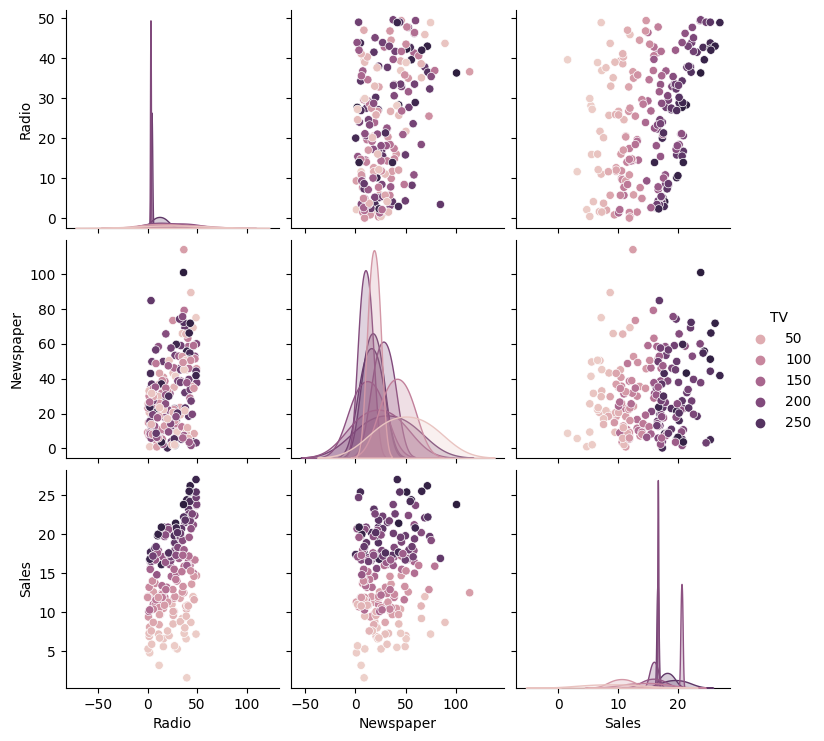

In [238]:
sns.pairplot(sales_df,hue='TV')

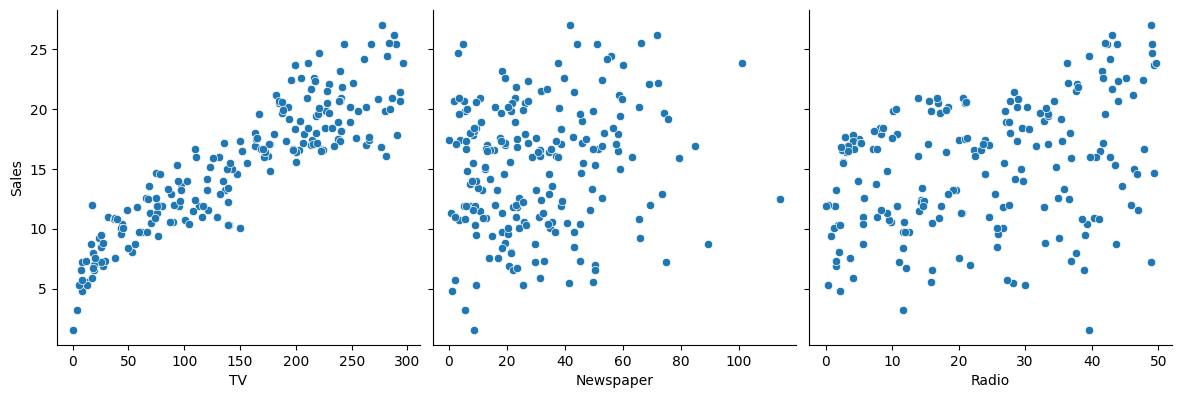

In [239]:
sns.pairplot(sales_df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

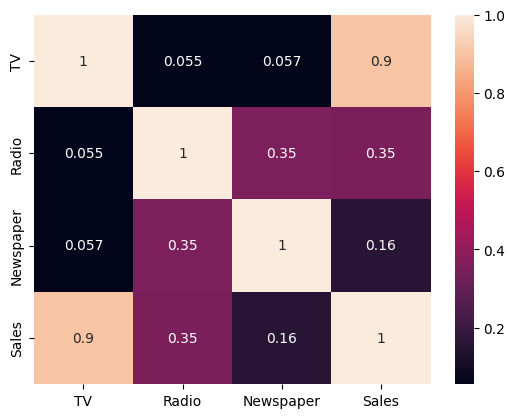

In [240]:
corr=sales_df.corr()
sns.heatmap(corr,annot=True)
plt.show()

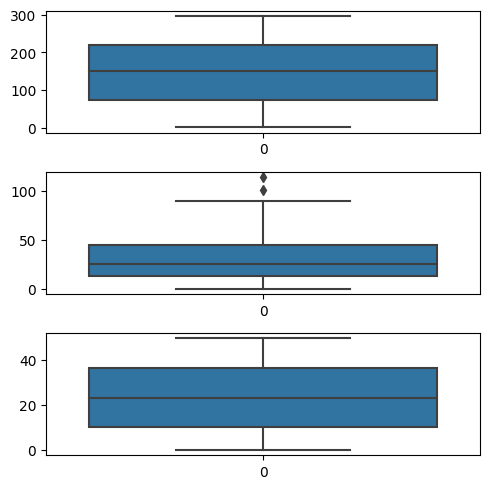

In [241]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(sales_df['TV'], ax = axs[0])
plt2 = sns.boxplot(sales_df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(sales_df['Radio'], ax = axs[2])
plt.tight_layout()

C:\Users\91863\AppData\Local\Temp\ipykernel_21324\4290292398.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df['Sales'])


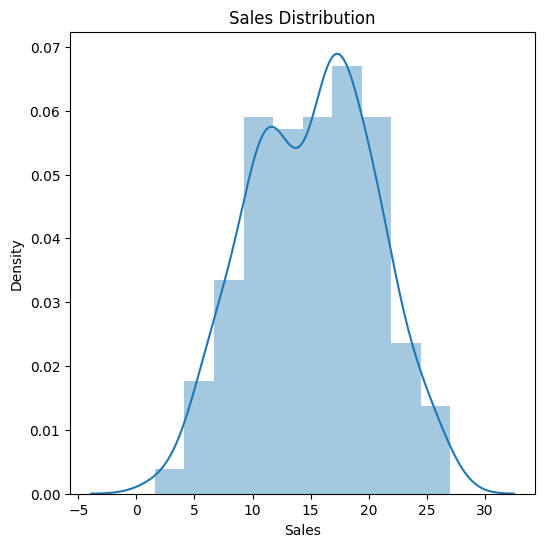

In [242]:
plt.figure(figsize=(6,6))
sns.distplot(sales_df['Sales'])
plt.title('Sales Distribution')
plt.show()

C:\Users\91863\AppData\Local\Temp\ipykernel_21324\1796908860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df['TV'])


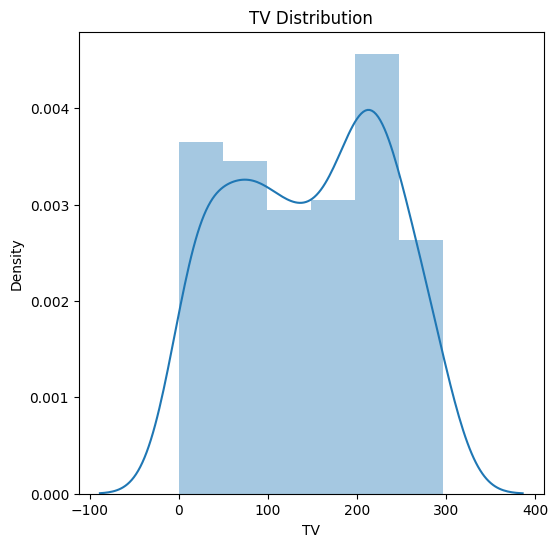

In [243]:
plt.figure(figsize=(6,6))
sns.distplot(sales_df['TV'])
plt.title('TV Distribution')
plt.show()

C:\Users\91863\AppData\Local\Temp\ipykernel_21324\2120352629.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df['Radio'])


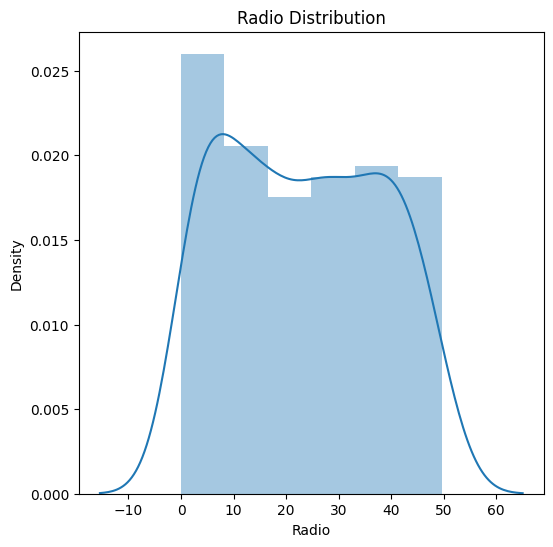

In [244]:
plt.figure(figsize=(6,6))
sns.distplot(sales_df['Radio'])
plt.title('Radio Distribution')
plt.show()

C:\Users\91863\AppData\Local\Temp\ipykernel_21324\3518250022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df['Newspaper'])


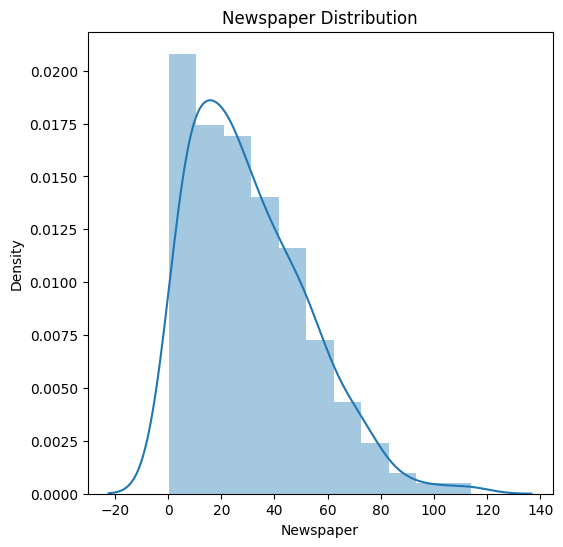

In [245]:
plt.figure(figsize=(6,6))
sns.distplot(sales_df['Newspaper'])
plt.title('Newspaper Distribution')
plt.show()

In [246]:
X = sales_df.drop(["Sales"],axis=1)
y = sales_df.Sales

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42 ,test_size=0.25)

In [248]:
print(X_train)

        TV  Radio  Newspaper
114   78.2   46.8       34.5
173  168.4    7.1       12.8
5      8.7   48.9       75.0
126    7.8   38.9       50.6
117   76.4    0.8       14.8
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[150 rows x 3 columns]


In [249]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred= model.predict(X_train)

In [250]:
print("sq : {}".format(r2_score(y_true=y_train ,y_pred=y_pred)))
print(f"mae : {mean_absolute_error(y_train,y_pred)}")

sq : 0.8957759851376041
mae : 1.286798699894718


In [251]:
residuals = y_train.values - y_pred

mean_residuals = np.mean(residuals)
print("Mean : {}".format(mean_residuals))

Mean : -2.0605739337042904e-15


C:\Users\91863\AppData\Local\Temp\ipykernel_21324\2535024892.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals , bins=20)


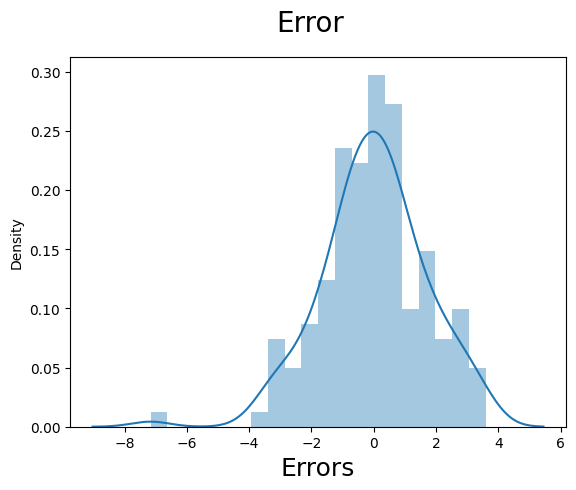

In [252]:
fig = plt.figure()
sns.distplot(residuals , bins=20)
fig.suptitle('Error', fontsize = 20)    
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [253]:
X = sales_df['TV']
y = sales_df['Sales']

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

Linear Regression

In [255]:
regressor = LinearRegression()
regressor.fit(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1))
y_pred = regressor.predict(np.array(X_test).reshape(-1, 1))
r2_score(y_test, y_pred)

0.7379505685137663

Polynomail Regression

In [256]:
poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(np.array(X_train).reshape(-1,1))
X_test_poly = poly.transform(np.array(X_test).reshape(-1,1))

regressor = LinearRegression()
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)

r2_score(y_test, y_pred)

0.7644950024445272